## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Loading Our Dataset**

In [2]:
from google.colab import files

In [3]:
dataset = files.upload()


Saving BTC-USD.csv to BTC-USD.csv


In [4]:
df = pd.read_csv('BTC-USD.csv')

## **Feature Extraction**

 The number of the trading days and the columns: 

In [5]:
df.shape

(1827, 7)

In [6]:
df = df['Open'].values
df = df.reshape(-1, 1)

After extracting one column:


In [7]:
df.shape

(1827, 1)

In [8]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1461, 1)
(366, 1)


Importing our model:

In [9]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Scaling data:

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.01918636],
       [0.01609495],
       [0.01694919],
       [0.01531178],
       [0.01378537]])

In [11]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.68790924],
       [0.68882267],
       [0.72164775],
       [0.76478995],
       [0.75720234]])

In [12]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

Creating training and testing datasets:

In [13]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Creating our LSTM model:

In [14]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Reshape features for the LSTM layer:

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [17]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
45/45 [==============================] - 17s 165ms/step - loss: 0.0095
Epoch 2/50
45/45 [==============================] - 7s 163ms/step - loss: 0.0045
Epoch 3/50
45/45 [==============================] - 7s 165ms/step - loss: 0.0033
Epoch 4/50
45/45 [==============================] - 7s 165ms/step - loss: 0.0026
Epoch 5/50
45/45 [==============================] - 7s 164ms/step - loss: 0.0026
Epoch 6/50
45/45 [==============================] - 8s 175ms/step - loss: 0.0031
Epoch 7/50
45/45 [==============================] - 9s 184ms/step - loss: 0.0021
Epoch 8/50
45/45 [==============================] - 7s 164ms/step - loss: 0.0019
Epoch 9/50
45/45 [==============================] - 7s 164ms/step - loss: 0.0020
Epoch 10/50
45/45 [==============================] - 7s 163ms/step - loss: 0.0017
Epoch 11/50
45/45 [==============================] - 7s 162ms/step - loss: 0.0022
Epoch 12/50
45/45 [==============================] - 7s 163ms/step - loss: 0.0018
Epoch 13/50
45/45 [=====

In [18]:
model = load_model('stock_prediction.h5')

## **Results visualization**

10/10 [==============================] - 6s 90ms/step


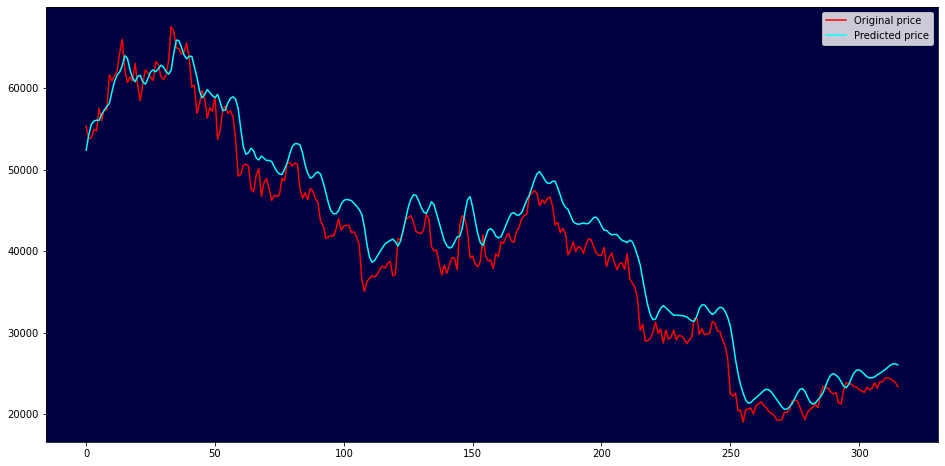

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [22]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [23]:
MAPE(y_test_scaled,predictions)

7.082754143993419

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(y_test_scaled,predictions)

9303806.318986133